In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import urbanpy as up

In [2]:
restaurants = gpd.read_file('outputs/clean_restaurants.geojson')
surveys = gpd.read_file('outputs/clean_surveys.geojson')
markets = gpd.read_file('outputs/clean_markets.geojson')

Build demand dataset, aggregate vulnerable population by hexagons

In [5]:
# Download district boundaries
surquillo = up.download.nominatim_osm('surquillo')
surquillo.crs = 'EPSG:4326'

In [16]:
hexagons = up.geom.gen_hexagons(9, surquillo)

/home/claudio/Documents/food_system_vulnerability/.env/lib/python3.9/site-packages/urbanpy/geom/geom.py:168: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  city_poly = city.explode().reset_index(drop=True)


<AxesSubplot:>

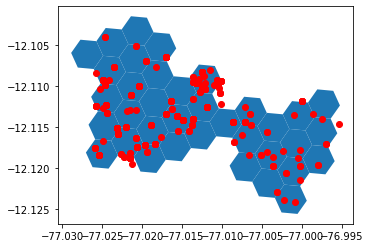

In [17]:
ax = hexagons.plot()
surveys.plot(color='r', ax=ax)

Build FLP model

In [92]:
hexagons_pop = up.geom.merge_shape_hex(
    hexagons, 
    surveys[surveys['svi'] > 0], 
    how='inner', 
    op='intersects', 
    agg={'nombre_encuesta': 'count',
         'svi': 'mean'}
)
hexagons_pop = hexagons_pop.rename({'nombre_encuesta':'n_surveys'}, axis=1)
hexagons_pop['n_surveys'] = hexagons_pop['n_surveys'].fillna(0)
hexagons_pop['svi'] = hexagons_pop['svi'].fillna(0)
hexagons_pop['svi_norm'] = hexagons_pop['svi'] / 4 # simple normalization

/home/claudio/Documents/food_system_vulnerability/.env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:>

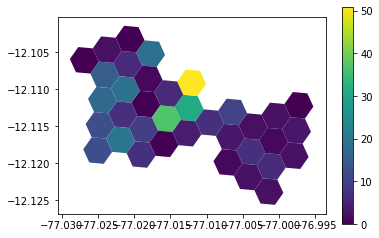

In [93]:
hexagons_pop.plot(column='n_surveys', legend=True)

<AxesSubplot:>

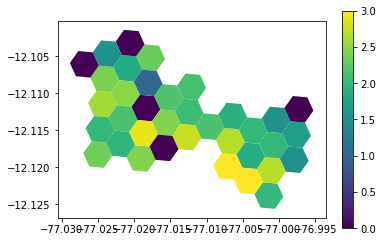

In [94]:
hexagons_pop.plot(column='svi', legend=True)

In [60]:
up.routing.start_osrm_server('peru', 'south-america', 'foot')

[
    {
        "Id": "7d521f03c6e025d74065049267533b2bdda413ad026ab5bad18e96567545b31a",
        "Created": "2020-12-21T04:41:23.291870208Z",
        "Path": "osrm-routed",
        "Args": [
            "--algorithm",
            "mld",
            "/data/peru-latest.osm.pbf"
        ],
        "State": {
            "Status": "exited",
            "Running": false,
            "Paused": false,
            "Restarting": false,
            "OOMKilled": false,
            "Dead": false,
            "Pid": 0,
            "ExitCode": 0,
            "Error": "",
            "StartedAt": "2020-12-21T06:05:25.883657779Z",
            "FinishedAt": "2020-12-21T06:29:47.644114166Z"
        },
        "Image": "sha256:1cf8a5ae83ec71c8d5b0a69149b42846625eb064b36427ae6207db538506537b",
        "ResolvConfPath": "/var/lib/docker/containers/7d521f03c6e025d74065049267533b2bdda413ad026ab5bad18e96567545b31a/resolv.conf",
        "HostnamePath": "/var/lib/docker/containers/7d521f03c6e025d74065049267533

In [63]:
hexs_centroids = hexagons.copy() # Copy original gdf
hexs_centroids.geometry = hexagons.geometry.centroid # Replace Polygon for Polygon Centroid (Point)

/tmp/ipykernel_14930/4131747649.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hexs_centroids.geometry = hexagons.geometry.centroid # Replace Polygon for Point/Polygon Centroid


In [66]:
try:
    cost_mat = np.load('outputs/distance_matrix.npy')
except:
    distance, duration = up.routing.compute_osrm_dist_matrix(hexs_centroids, markets)
    cost_mat = duration.T
    np.save('outputs/distance_matrix.npy', cost_mat) # save the file to avoid running this function again    

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

In [67]:
up.routing.stop_osrm_server('peru', 'south-america', 'foot')

UID                 PID                 PPID                C                   STIME               TTY                 TIME                CMD
root                15990               15968               0                   23:44               pts/0               00:00:02            osrm-routed --algorithm mld /data/peru-latest.osm.pbf
osrm_routing_server_south-america_peru_foot
Server was stoped succesfully


In [121]:
p = 2

Now we create dictionaries for the demand and cost, associating each customer (hexagon) to the demand (vulnerable population) and each facility (traditional market) the respective cost (travel time) to each customer

In [122]:
customers = list(hexs_centroids.index)
facilities = [f'FAC_{i}' for i in markets.index]

Build the facility and customer set as lists, as per PuLP requirements

In [103]:
demand = {i: hexagons_pop.loc[i, 'n_surveys'] for i in hexagons_pop.index}

In [110]:
cost_dict = {facilities[i]: {customers[j]: cost_mat[i][j] * (1 - hexagons_pop.loc[j, 'svi_norm']) for j in hexagons_pop.index} for i in markets.index}

Create problem variable for PuLP

In [113]:
from pulp import *

In [114]:
prob = LpProblem('FLP_Markets_Surquillo', LpMinimize)

We create the decision variable, representing the percentage of service assigned from a facility to a customer, setting 0 as the lower bound

In [115]:
x = LpVariable.dicts('Service', 
                    [(i,j) for j in customers for i in facilities],
                    0)

Now we create the decision variable to activate a facility

In [116]:
y = LpVariable.dicts('Activation',
                     facilities,
                     0,1, LpBinary)

Setting the objective function

In [118]:
prob += lpSum(lpSum(demand[j]*cost_dict[i][j]*x[i,j] for i in facilities) for j in customers)

We add the first constraint

In [119]:
for j in customers:
    prob += lpSum(x[i,j] for i in facilities) == 1

Adding the second constraint

In [123]:
prob += lpSum(y[i] for i in facilities) == p

Third constraint

In [124]:
for i in facilities:
    for j in customers:
        prob += x[i,j] <= y[i]

Solve (a custom solver may be added in the solve method)

In [126]:
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/claudio/Documents/food_system_vulnerability/.env/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/linux/64/cbc /tmp/eebce7ceb1e7428984d7b2fa96ff79d4-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/eebce7ceb1e7428984d7b2fa96ff79d4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 546 COLUMNS
At line 2535 RHS
At line 3077 BOUNDS
At line 3092 ENDATA
Problem MODEL has 541 rows, 518 columns and 1526 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 80111.6 - 0.00 seconds
Cgl0004I processed model has 541 rows, 518 columns (14 integer (14 of which binary)) and 1526 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 80111.6
Cbc0038I Relaxing continuous gives 80111.6
Cbc0038I Before mini branch and bound, 14 integers at bound fixed 

1

Check solution status

In [127]:
print("Status:", LpStatus[prob.status])

Status: Optimal


Obtain the demand assignments

In [129]:
x_vars = [[0 for j in range(len(customers))] for i in range(len(facilities))]

In [130]:
for v in prob.variables():
    if 'Activation' not in v.name:
        i, j = re.findall('\d+', v.name)
        x_vars[int(i)][int(j)] = v.varValue

In [131]:
y_vars = np.zeros_like(facilities)

In [132]:
for v in prob.variables():
    if 'Activation' in v.name:
        ix = int(re.findall('\d+', v.name)[0])
        y_vars[ix] = v.varValue

In [133]:
y_vars = y_vars.astype(float)

In [134]:
x_vars, y_vars = np.array(x_vars), np.array(y_vars)

In [136]:
x_vars.shape

(14, 36)

In [137]:
y_vars.shape

(14,)

In [138]:
markets.shape

(14, 364)

In [140]:
markets['is_selected'] = y_vars

Visualize markets selected by the FLP model & choropleth maps of vulnerability vars

In [154]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

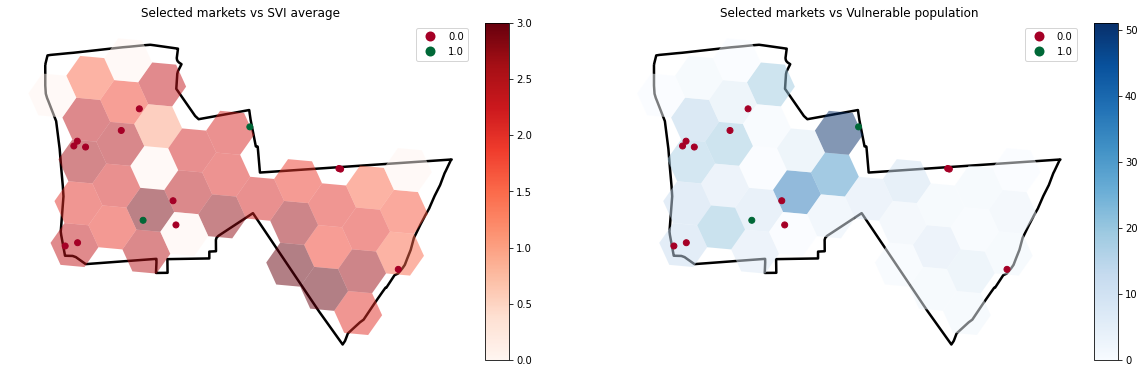

In [162]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,15))

ax1.set_title('Selected markets vs SVI average')

divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="5%", pad=0.1)

surquillo.plot(color='none', linewidth=2.5, ax=ax1) # Limits
hexagons_pop.plot(column='svi', legend=True, cmap='Reds', alpha=0.5, ax=ax1, cax=cax1) # Basemap
markets.plot('is_selected', legend=True, cmap='RdYlGn', categorical=True, ax=ax1) # PoIs

ax1.set_axis_off()

##

ax2.set_title('Selected markets vs Vulnerable population')

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.1)

surquillo.plot(color='none', linewidth=2.5, ax=ax2)  # Limits
hexagons_pop.plot(column='n_surveys', legend=True, cmap='Blues', alpha=0.5, ax=ax2, cax=cax2) # Basemap
markets.plot('is_selected', legend=True, cmap='RdYlGn', categorical=True, ax=ax2) # PoIs

ax2.set_axis_off()